In [ ]:
# importing basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import datetime # manipulating date formats

# Vizualization
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
%matplotlib inline

# settings
import warnings
warnings.filterwarnings("ignore")

**Historical sales data for 45 stores of a Retail chain located in different regions is provided. Each store contains a number of departments. The task is to find the best fitting model to predict the department-wide sales for each store.**

The process adopted in this notebook will involve EDA, Pre-processing and Modelling, Cross-Validation, Hyper parameter tuning and making final predictions

Importing datas using Pandas

In [ ]:

# reading data
features=pd.read_csv("/content/Features_data_set.csv")
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
stores=pd.read_csv("/content/stores_data_set.csv")
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
train=pd.read_csv("/content/sales_data_set.csv")
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:

test = train.drop("Weekly_Sales", axis=1)
test

,Store,Dept,Date,IsHoliday
0,1,1,05/02/2010,False
1,1,1,12/02/2010,True
2,1,1,19/02/2010,False
3,1,1,26/02/2010,False
4,1,1,05/03/2010,False
...,...,...,...,...
421565,45,98,28/09/2012,False
421566,45,98,05/10/2012,False
421567,45,98,12/10/2012,False
421568,45,98,19/10/2012,False


Getting some descriptive statistics/summary of the datas using Pandas

In [ ]:

df_names=['features','stores','train','test']
df_list=[features,stores,train,test]
for i in range(4):
    print('--'*15)
    print(f'Dataframe {df_names[i]} has {df_list[i].shape[0]} rows and {df_list[i].shape[1]} columns.')
    print('--'*15)
    display(df_list[i].head(5))

------------------------------
Dataframe features has 8190 rows and 12 columns.
------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


------------------------------
Dataframe stores has 45 rows and 3 columns.
------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


------------------------------
Dataframe train has 421570 rows and 5 columns.
------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


------------------------------
Dataframe test has 421570 rows and 4 columns.
------------------------------


,Store,Dept,Date,IsHoliday
0,1,1,05/02/2010,False
1,1,1,12/02/2010,True
2,1,1,19/02/2010,False
3,1,1,26/02/2010,False
4,1,1,05/03/2010,False


Checking the duration of the data record for the model preparation

In [ ]:
# checking time duration of records
for i in [0,2,3]:
    print(f'Dataframe {df_names[i]} contains data from {df_list[i].Date.min()} to {df_list[i].Date.max()}.\n')


Dataframe features contains data from 01/02/2013 to 31/12/2010.

Dataframe train contains data from 01/04/2011 to 31/12/2010.

Dataframe test contains data from 01/04/2011 to 31/12/2010.



In [ ]:
for i in [0, 2, 3]:
    print(f'Dataframe {df_names[i]} contains data from {df_list[i]["Date"].min()} to {df_list[i]["Date"].max()}.\n')


Dataframe features contains data from 01/02/2013 to 31/12/2010.

Dataframe train contains data from 01/04/2011 to 31/12/2010.

Dataframe test contains data from 01/04/2011 to 31/12/2010.



checking for duplicates and nulls.

In [ ]:
# checking missing values
for i in range(4):
    print(f'Dataframe {df_names[i]} has missing values.\n') if (df_list[i].isna().sum().any()==True) else print(f'Dataframe {df_names[i]} does not have missing values.')


Dataframe features has missing values.

Dataframe stores does not have missing values.
Dataframe train does not have missing values.
Dataframe test does not have missing values.


Finding percentage of missing data in the feature data

In [ ]:
print('Percentages of missing values in features dataframe.')
(100*features.isna().sum()/features.shape[0]).sort_values()

Percentages of missing values in features dataframe.


Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
IsHoliday        0.000000
CPI              7.142857
Unemployment     7.142857
MarkDown5       50.549451
MarkDown1       50.769231
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown2       64.334554
dtype: float64

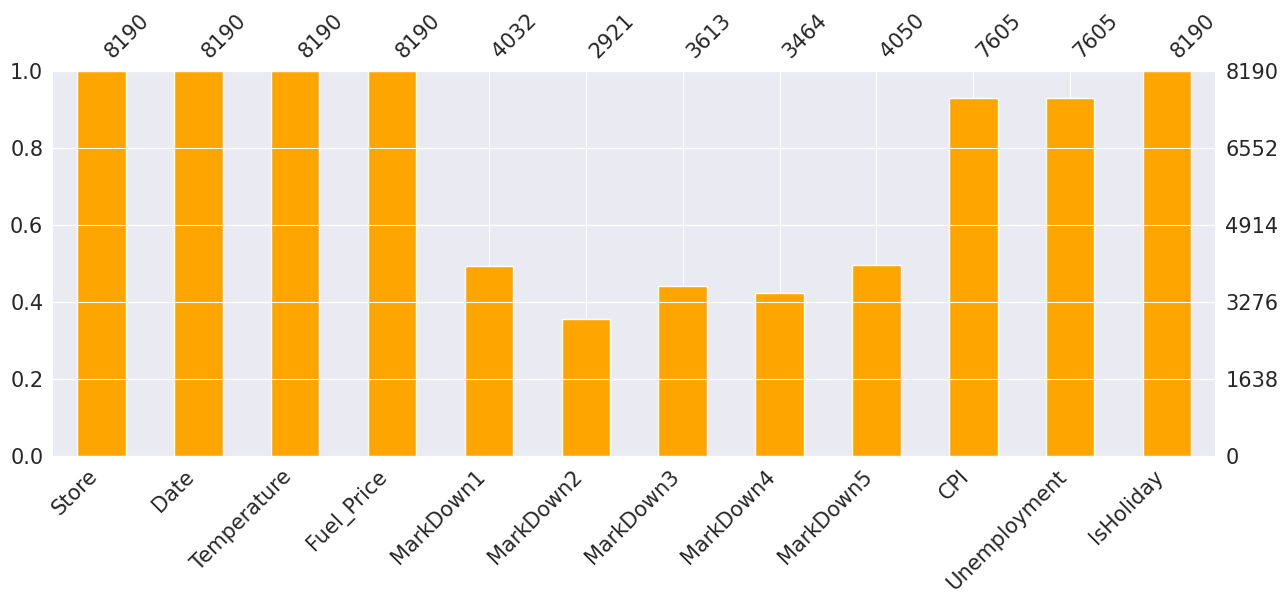

In [ ]:

import missingno as msno
msno.bar(features,figsize=(15, 5),fontsize=15, color='orange');

All the markdown columns have more than 50% missing values. So, it's quite difficult to choose best imputation technique. If correlation of these columns is not strong with target variable, I will drop them. Let's do EDA first.

**EDA**

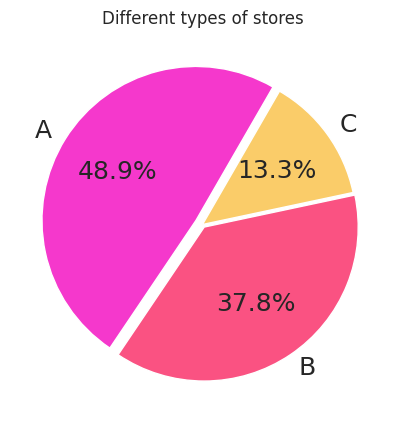

In [ ]:

# pie chart
labels = stores.Type.value_counts().index.tolist()
sizes = stores.Type.value_counts().values.tolist()
explode = (0.05, 0.02, 0)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=60,
        textprops={'fontsize': 18},colors=['#f538cc','#fa5282','#facc69'])
plt.title('Different types of stores');

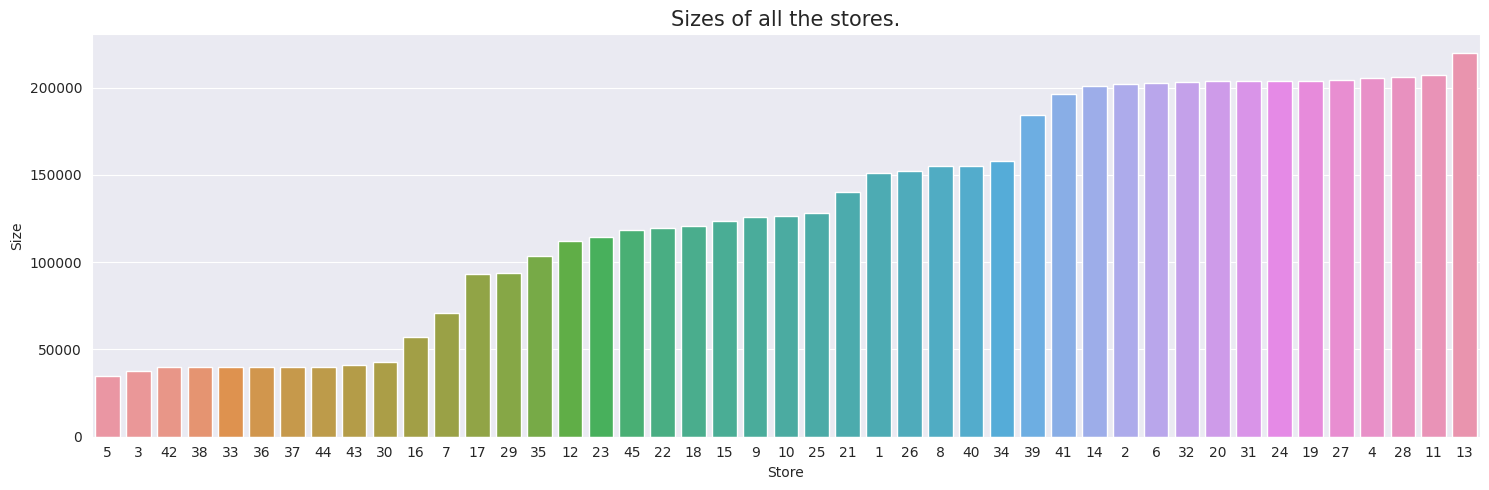

In [ ]:

plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Sizes of all the stores.',fontsize=15)
plt.tight_layout();

There are broadly 3 types of stores: small-sized, medium-sized and large-sized. This numerical variable can be converted into categorical variable using pd.cut function but first let's check relation between size and type of the stores.

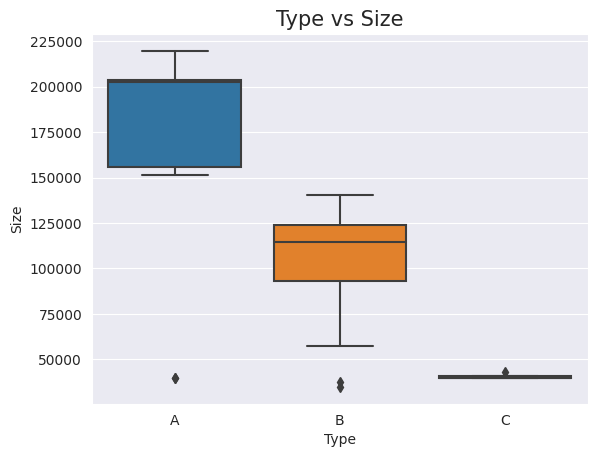

In [ ]:

#sns.set_style('whitegrid')
sns.boxplot(x='Type',y='Size',data=stores)
plt.title('Type vs Size',fontsize=15);

Though we don't have any knowledge about how stores were divided into these types, we can see from the graph that it covers the effect of size column.

Now, let us combine the data files for further exploration

In [ ]:
# combining train/test and stores and features dataframes for further analysis

train_expanded = train.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
train_expanded = train_expanded.merge(stores, how='inner', on=['Store'])

test_expanded = test.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
test_expanded = test_expanded.merge(stores, how='inner', on=['Store'])

# converting dtype of date column
train_expanded['Date'] = pd.to_datetime(train_expanded['Date'])
test_expanded['Date'] = pd.to_datetime(test_expanded['Date'])

# Checking the combined data for train_expanded
train_expanded.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2011-01-04,20398.09,False,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,A,151315
1,1,1,2012-01-06,16065.49,False,77.95,3.501,6086.21,12.0,370.51,148.75,3690.85,221.747214,7.143,A,151315
2,1,1,2011-01-07,15363.50,False,85.55,3.524,NaN,NaN,NaN,NaN,NaN,215.184137,7.962,A,151315
3,1,1,2010-01-10,20094.19,False,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,A,151315
4,1,1,2012-02-03,20113.03,False,60.96,3.630,15441.40,1569.0,10.80,25390.88,8067.61,220.848045,7.348,A,151315


Plotting train_expanded data with sales

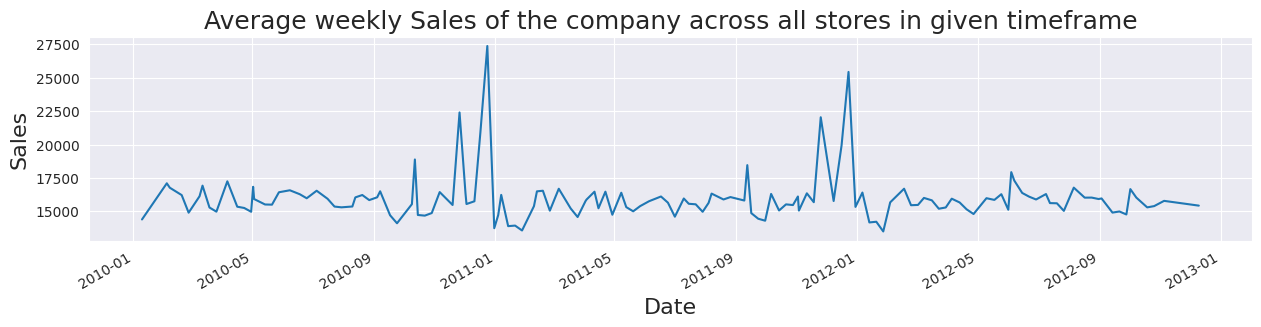

In [ ]:
plt.figure(figsize=(15,3))
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

Plot to find yearly trend for:
Weekly sales of the company
1. On different years
2. On the type [A,B,C] of stores

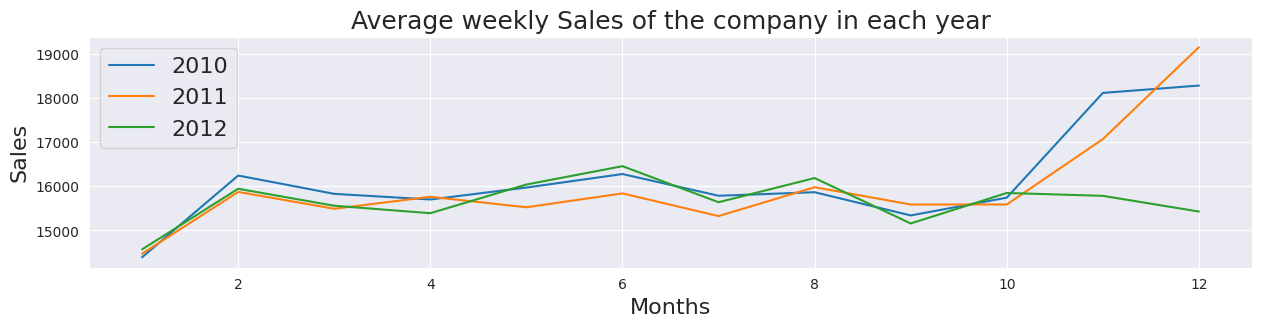

In [ ]:

## 1

# creating 3 new features from date column

for df in [train_expanded,test_expanded]:
    df['Week'] = df['Date'].dt.week
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

plt.figure(figsize=(15,3))
train_expanded[train_expanded['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company in each year', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

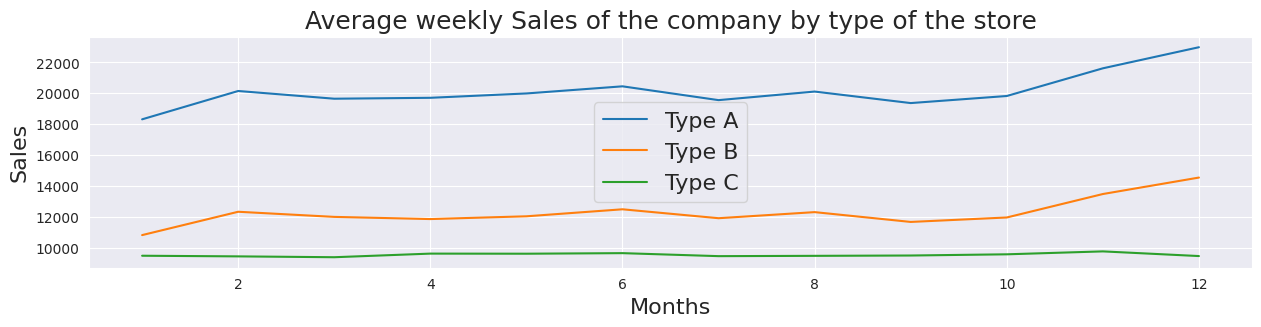

In [ ]:

## 2

plt.figure(figsize=(15,3))
train_expanded[train_expanded['Type']=='A'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='B'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='C'].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company by type of the store', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

Sales of the company see rise during the end of the year. Possible reasons could be any tradition or festival in that company.

Type A stores seem to have comparitively high sales. But this can be due to difference in number of stores of different type. Also, we can notice that sales of type C are constant over the year.

Dropping NaNs and finding most correlating features for the dataframe with Weekly_Sales

In [ ]:

corr=train_expanded.dropna().corr()
corr.style.background_gradient(cmap='magma')

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
Store,1.000000,0.008392,-0.053834,-0.005363,-0.153155,0.136718,0.006861,-0.019274,-0.018068,0.002050,0.060453,-0.213719,0.221854,0.088596,-0.011084,-0.012472,0.007465
Dept,0.008392,1.000000,0.137125,0.002026,-0.001662,-0.000743,0.004395,0.001124,0.003469,0.004650,0.004794,-0.006935,0.002805,0.018307,0.002431,0.002532,-0.001466
Weekly_Sales,-0.053834,0.137125,1.000000,0.014389,0.013029,-0.020557,0.037341,0.015829,0.062792,0.029471,0.059649,-0.016371,-0.037735,0.212192,0.044140,0.044283,-0.057498
IsHoliday,-0.005363,0.002026,0.014389,1.000000,-0.153325,-0.136284,-0.062978,0.345704,0.423164,-0.017209,-0.076273,-0.001871,0.022496,-0.024260,0.359647,0.360943,-0.266867
Temperature,-0.153155,-0.001662,0.013029,-0.153325,1.000000,0.250824,0.019313,-0.332382,-0.088348,-0.057895,0.024329,0.201037,-0.009300,0.078196,0.058888,0.051234,0.390732
Fuel_Price,0.136718,-0.000743,-0.020557,-0.136284,0.250824,1.000000,0.084308,-0.243836,-0.093533,-0.025784,-0.137564,-0.365318,0.276568,0.005225,-0.129311,-0.144246,0.402771
MarkDown1,0.006861,0.004395,0.037341,-0.062978,0.019313,0.084308,1.000000,-0.001615,-0.130754,0.828928,0.107125,-0.046005,0.064428,0.184665,-0.187311,-0.163200,0.185957
MarkDown2,-0.019274,0.001124,0.015829,0.345704,-0.332382,-0.243836,-0.001615,1.000000,-0.051240,-0.017517,-0.023390,-0.036992,0.018334,0.081513,0.112986,0.113929,-0.226489
MarkDown3,-0.018068,0.003469,0.062792,0.423164,-0.088348,-0.093533,-0.130754,-0.051240,1.000000,-0.080216,-0.043373,-0.025030,0.013967,0.035212,0.196986,0.190094,-0.327598
MarkDown4,0.002050,0.004650,0.029471,-0.017209,-0.057895,-0.025784,0.828928,-0.017517,-0.080216,1.000000,0.101114,-0.041662,0.018817,0.133569,-0.204905,-0.178973,0.166603


It seems the features 'Dept'and 'Size' have 13% and 21% correlation with Weekly_sales. The contribution of other features are comparatively low

Let us confirm our finding with bar plot

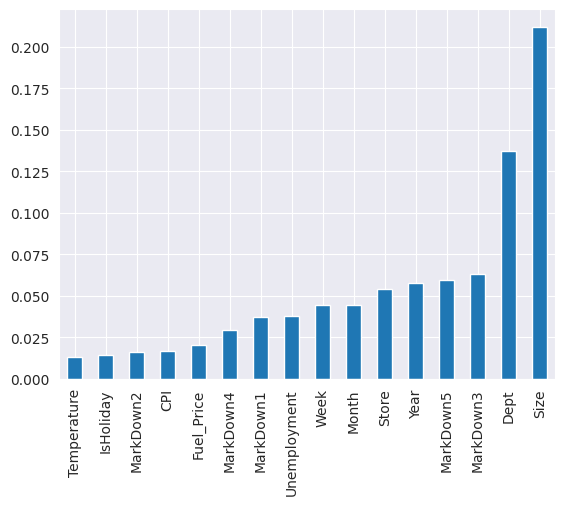

In [ ]:

train_expanded.dropna().corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

The bar plot confirms our findings, but the distribution of target variable is highly skewed. That's why, I will not go with linear regression

Pre-processing and modelling

In [ ]:

# importing relevant libraries

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

As per the EDA observation
The following features are level encoded:
IsHoliday, Type.

The following features are dropped:
Year, CPI, unemployment, temperature, fuel price, All the 'markdown' columns.

In [ ]:
# preprocessing

def preprocessor(df):
    # label-encoding
    df['IsHoliday'] = df['IsHoliday'].astype('str').map({'True':0,'False':1})
    df.Type = df.Type.map({'A':2,'B':1,'C':0})
    # deleting less important features
    return df.drop(['Date','Year','MarkDown1','MarkDown2','MarkDown4','MarkDown3','MarkDown5','CPI',
             'Unemployment','Temperature','Fuel_Price'],axis=1)

train_preprocessed = preprocessor(train_expanded)
test_preprocessed = preprocessor(test_expanded)

In [ ]:

train_preprocessed

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Week,Month
0,1,1,20398.09,1,2,151315,1,1
1,1,1,16065.49,1,2,151315,1,1
2,1,1,15363.50,1,2,151315,1,1
3,1,1,20094.19,1,2,151315,1,1
4,1,1,20113.03,1,2,151315,5,2
...,...,...,...,...,...,...,...,...
421565,45,98,5.50,1,1,118221,30,7
421566,45,98,727.05,1,1,118221,39,9
421567,45,98,553.21,0,1,118221,52,12
421568,45,98,346.04,1,1,118221,35,8


In [ ]:
test_preprocessed

,Store,Dept,IsHoliday,Type,Size,Week,Month
0,1,1,1,2,151315,1,1
1,1,1,1,2,151315,1,1
2,1,1,1,2,151315,1,1
3,1,1,1,2,151315,1,1
4,1,1,1,2,151315,5,2
...,...,...,...,...,...,...,...
421565,45,98,1,1,118221,30,7
421566,45,98,1,1,118221,39,9
421567,45,98,0,1,118221,52,12
421568,45,98,1,1,118221,35,8


In [ ]:
from sklearn.model_selection import train_test_split

# splitting data into 2 parts

y = train_preprocessed["Weekly_Sales"]
X = train_preprocessed.drop(['Weekly_Sales'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

# function for displaying scores

def score_calc(predictions):
    scores = pd.DataFrame([mean_absolute_error(y_test, predictions)
    #                      ,mean_squared_error(y_test, predictions)
                          ,r2_score(y_test, predictions)],columns=['score'],index=['MAE','R2 score'])
    return scores

# function for building model

def run_model(model,name):

    name = model()
    name.fit(X_train, y_train)
    preds = name.predict(X_test)
    try:
        feat_imp = name.feature_importances_
        plt.bar(X_train.columns,feat_imp,color='green')
        plt.title('Feature Importance graph')
        plt.xticks(rotation=45)
    except:
        pass
    return score_calc(preds)

In [ ]:

train_preprocessed.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Week,Month
0,1,1,20398.09,1,2,151315,1,1
1,1,1,16065.49,1,2,151315,1,1
2,1,1,15363.50,1,2,151315,1,1
3,1,1,20094.19,1,2,151315,1,1
4,1,1,20113.03,1,2,151315,5,2


Model testing
1. Using all features
2. Using best contributing features

1

Using all features

,score
MAE,2561.394139
R2 score,0.930296


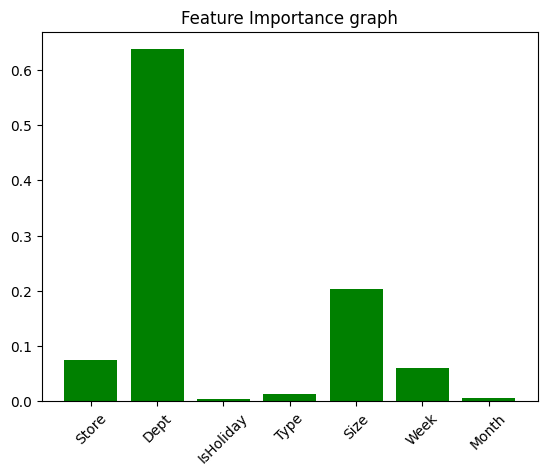

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
# Now you can use DecisionTreeRegressor in your code

run_model(DecisionTreeRegressor,'dtree')

,score
MAE,2291.969227
R2 score,0.945990


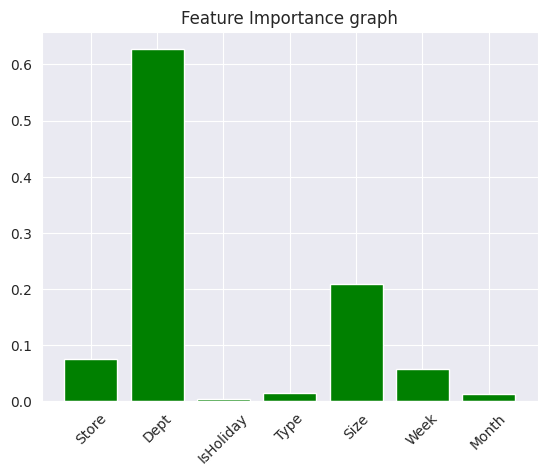

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
run_model(RandomForestRegressor,'rfc')

,score
MAE,3098.864809
R2 score,0.936488


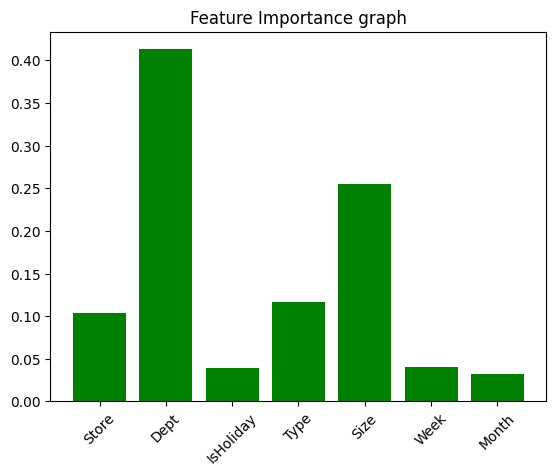

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
run_model(XGBRegressor,'xgb')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
run_model(KNeighborsRegressor,'knn')

,score
MAE,5882.091396
R2 score,0.757022


2
Using Store, Department and Size columns

In [ ]:
X_train = X_train[['Store','Dept','Size']]
X_test = X_test[['Store','Dept','Size']]

,score
MAE,2662.665531
R2 score,0.916865


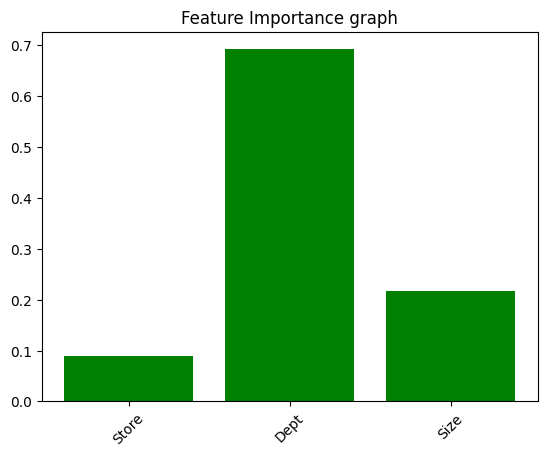

In [ ]:

run_model(DecisionTreeRegressor,'dtree')

,score
MAE,2663.467588
R2 score,0.916861


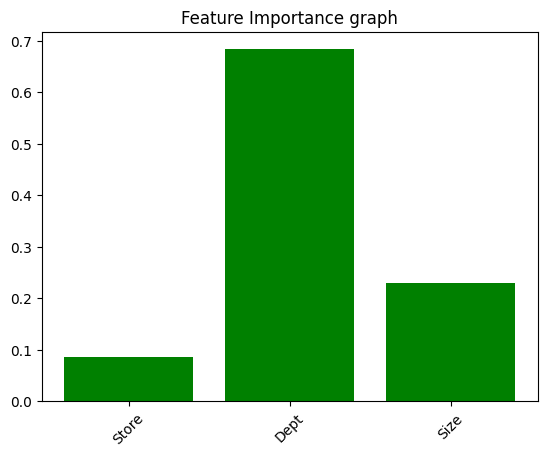

In [ ]:

run_model(RandomForestRegressor,'rfc')

,score
MAE,3184.626212
R2 score,0.909254


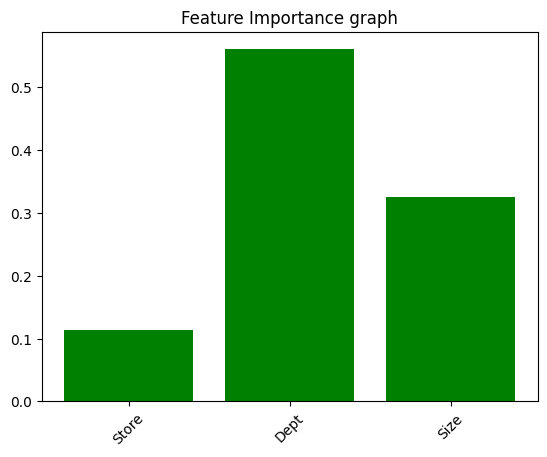

In [ ]:

run_model(XGBRegressor,'xgb')

In [ ]:

run_model(KNeighborsRegressor,'knn')

,score
MAE,2961.247316
R2 score,0.897378


Comparing result from different models to choose the best fitting model
dtree	rfc	xgb	knn
All features	MAE	1977.3930	1763.3921	7040.4298	5836.1201
R2 score	0.9528	0.9678	0.7349	0.7580
Selective features	MAE	2661.6495	2662.1889	6746.2674	2975.2761
R2 score	0.9052	0.9051	0.7416	0.8881
RandomForestRegressor using all features gives the best result. So cross-validation and Hyper parameter tuning is done on this model to get the final prediction

RandomForestRegressor using all features gives the best result. So cross-validation and Hyper parameter tuning is done on this model to get the final prediction

**Cross-validation**

In [ ]:

from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestRegressor(), X, y, cv=4)
print(f"Average 4-Fold CV Score: {score.mean().round(4)}")

Average 4-Fold CV Score: 0.6836


**Hyper parameter tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
random_grid = {'n_estimators': [50,60,70],
               'max_features': [3,4],
               'max_depth': [25,30,35],
               'min_samples_split': [3,4],
              'min_samples_leaf':[1,2]}

rf_grid = RandomizedSearchCV(RandomForestRegressor(),
                        random_grid,
                        cv = 4,
                        n_jobs = 5,
                        verbose=True)

rf_grid.fit(X,y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
0.769010856715636
{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 35}


In [ ]:
## cross-validation using kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
predictor_train_scale = train_preprocessed.drop('Weekly_Sales',axis=1)
predictor_test_scale = test_preprocessed
target_train = train_preprocessed.Weekly_Sales

kf=KFold(n_splits=4,shuffle=True)

preds_3   = list()
y_pred_3  = []
r2_score_ = []
mae=[]

# Applying model on each fold and calculating mean of score
for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train_scale)):

    X_train, y_train = predictor_train_scale.iloc[train_idx,:], target_train.iloc[train_idx]
    X_val, y_val = predictor_train_scale.iloc[val_idx, :], target_train.iloc[val_idx]

    print('\nFold: {}\n'.format(i+1))
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    r2 = r2_score(y_val,rf.predict(X_val))
    mae_ = mean_absolute_error(y_val,rf.predict(X_val))
    r2_score_.append(r2)
    mae.append(mae_)
    preds_3.append(rf.predict(predictor_test_scale[predictor_test_scale.columns]))

y_pred_final_3 = np.mean(preds_3,axis=0)

print('R2 - CV Score: {}'.format((sum(r2_score_)/4)),'\n')
print('MAE Score: {}'.format((sum(mae)/4)),'\n')
print("Score : ",r2_score_)



Fold: 1


Fold: 2


Fold: 3


Fold: 4

R2 - CV Score: 0.9416820312258074 

MAE Score: 2313.0422350210597 

Score :  [0.9401119559952887, 0.9449790361081322, 0.9351858883626516, 0.9464512444371572]


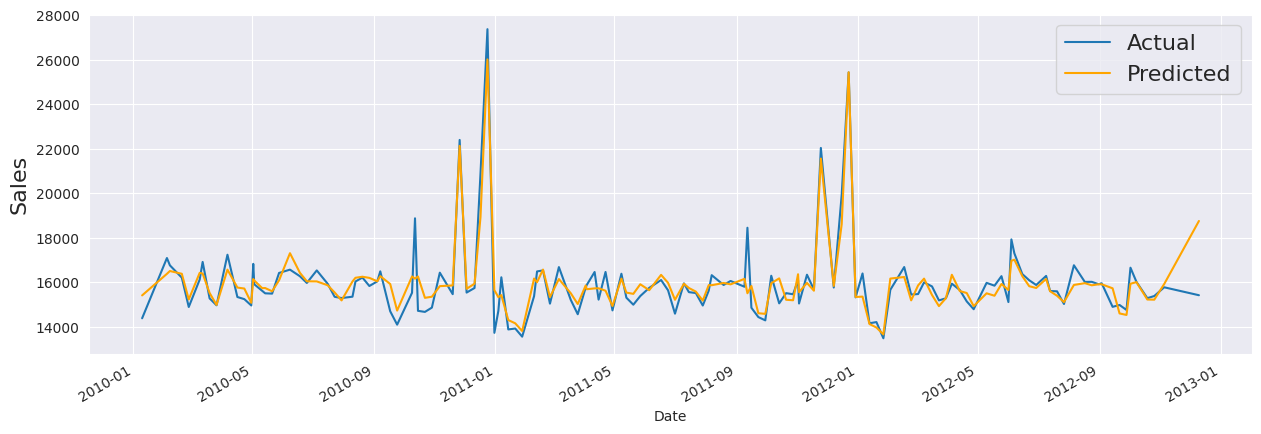

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
test_expanded['Weekly_Sales'] = y_pred_final_3
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
test_expanded.groupby('Date')['Weekly_Sales'].mean().plot(color='orange')
plt.legend(['Actual', 'Predicted'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16);

**Making final predictions**

In [ ]:
sales_prediction=pd.read_csv("/content/sales_data_set.csv")
sales_prediction['Weekly_Sales'] = y_pred_final_3
sales_prediction.to_csv('sales_prediction.csv',index=False)
sales_prediction

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,17958.938619,False
1,1,1,12/02/2010,17958.938619,True
2,1,1,19/02/2010,17958.938619,False
3,1,1,26/02/2010,17958.938619,False
4,1,1,05/03/2010,31293.289859,False
...,...,...,...,...,...
421565,45,98,28/09/2012,417.527695,False
421566,45,98,05/10/2012,613.211599,False
421567,45,98,12/10/2012,408.115193,False
421568,45,98,19/10/2012,428.993747,False
